<h1>Template Matching</h1>
<h2>Question:</h2>
<p>Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering- based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations. (Use hills.jpeg, template.png images) </p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load the images
image = cv2.imread("hills.jpeg")  # Main image
template = cv2.imread("template.png")  # Template to find

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

height, width = gray_template.shape[:2]
scale_factor = 0.5;

gray_template = cv2.resize(gray_template, (int(width * scale_factor),int(height * scale_factor)), interpolation=cv2.INTER_AREA)
# Get template dimensions
t_height, t_width = gray_template.shape

print(gray_image.shape)
print(gray_template.shape)

(225, 225)
(63, 42)


In [ ]:
# Perform template matching using normalized cross-correlation
result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)

plt.figure(figsize=(255,255))
plt.imshow(result)  
plt.title("Detected Template Match")
plt.axis("off")
plt.show()

# Find the maximum correlation location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(max_loc)
# Top-left corner of the best match
top_left = max_loc
bottom_right = (top_left[0] + t_width, top_left[1] + t_height)

# Draw a rectangle around the detected area
cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 3)

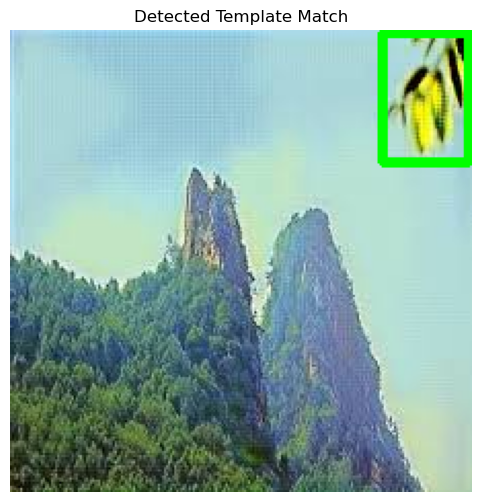

In [21]:
# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Detected Template Match")
plt.axis("off")
plt.show()